
# <p style="text-align:center;">Ford GoBike System Data Exploration</p>
## by (Hamza Mohamed)

## Introduction

> This dataset includes 183,412 bike trips from the Ford GoBike System in San Francisco (February 2019). It contains variables such as trip duration, user type, start/end times, and rider demographics.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv("./201902-fordgobike-tripdata.csv")

In [3]:
# check the data and know more information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# check the duplicates
df.duplicated().sum()

0

In [5]:
# check the missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# check the descriptive statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> There are <br />
**Rows :** `183,412`<br />
**Columns :** `16`<br />
**Wrong Data Type Columns :** `start_time`,`end_time`and`user_type`<br />
**Columns Contained Missing Values :** `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year` and  `member_gender`

### What is/are the main feature(s) of interest in your dataset?
- **Trip Duration**: It shows how long each ride lasts.
- **User Type**: It differentiates between subscribers and casual users.
- **Temporal Features (Start Day & Hour)**: They help identify peak usage times and patterns.
- **Age**: It allows analysis of how rider demographics relate to trip behavior.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

**1 - Duration:**
- Central to understanding trip length and patterns.

**2 - User Type:**
- Differentiates subscribers vs. casual users, crucial for comparing behavior.

**3 - Day & Hour:**
- Helps identify peak usage times and trends across weekdays/weekends.

**4 - Age:**
- Lets you explore how rider age relates to trip duration and user type.

## Cleaning

In [7]:
# create a copy of the original dataset to clean it
cleaned_df = df.copy()

In [8]:
# drop columns not relevant to my analysis
columns_to_drop = ['start_station_id', 'end_station_id', 'bike_id', 'bike_share_for_all_trip']
cleaned_df.drop(columns=columns_to_drop, inplace=True)

In [9]:
# convert time columns to datetime
cleaned_df['start_time'] = pd.to_datetime(cleaned_df['start_time'])
cleaned_df['end_time'] = pd.to_datetime(cleaned_df['end_time'])

In [10]:
# encode categorical variables
cleaned_df['user_type'] = cleaned_df['user_type'].astype('category')

In [11]:
# drop missing values 
cleaned_df.dropna(subset=['member_birth_year', 'member_gender'], inplace=True)

In [12]:
# check the data 
cleaned_df.info()
cleaned_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   175147 non-null  float64       
 5   start_station_longitude  175147 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     175147 non-null  float64       
 8   end_station_longitude    175147 non-null  float64       
 9   user_type                175147 non-null  category      
 10  member_birth_year        175147 non-null  float64       
 11  member_gender            175147 non-null  object        
dtypes: category(1), 

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender
159349,1413,2019-02-05 17:47:56.852,2019-02-05 18:11:30.832,4th St at Mission Bay Blvd S,37.770407,-122.391198,The Embarcadero at Sansome St,37.804770,-122.403234,Subscriber,1989.0,Female
48712,177,2019-02-22 07:25:04.057,2019-02-22 07:28:01.099,49th St at Telegraph Ave,37.835946,-122.262366,MacArthur BART Station,37.828410,-122.266315,Subscriber,1980.0,Female
28474,259,2019-02-25 08:42:29.094,2019-02-25 08:46:48.558,Market St at 45th St,37.834174,-122.272968,MacArthur BART Station,37.828410,-122.266315,Subscriber,1987.0,Male
10419,664,2019-02-27 20:28:32.544,2019-02-27 20:39:37.004,Esprit Park,37.761634,-122.390648,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,Subscriber,1987.0,Male
16595,437,2019-02-27 08:21:31.296,2019-02-27 08:28:48.302,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,Division St at Potrero Ave,37.769218,-122.407646,Subscriber,1985.0,Female
168814,427,2019-02-04 13:22:32.661,2019-02-04 13:29:40.536,Bancroft Way at Telegraph Ave,37.868813,-122.258764,MLK Jr Way at University Ave,37.871719,-122.273068,Subscriber,1999.0,Male
91794,323,2019-02-15 22:28:14.302,2019-02-15 22:33:37.922,West Oakland BART Station,37.805318,-122.294837,Marston Campbell Park,37.809824,-122.280192,Subscriber,1989.0,Female
139563,1162,2019-02-07 20:39:57.376,2019-02-07 20:59:20.115,Valencia St at Clinton Park,37.769188,-122.422285,Valencia St at Cesar Chavez St,37.747998,-122.420219,Subscriber,1975.0,Female
51303,941,2019-02-21 18:02:05.557,2019-02-21 18:17:46.904,Potrero del Sol Park (25th St at Utah St),37.751792,-122.405216,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,Subscriber,1978.0,Female
126581,415,2019-02-10 18:20:28.800,2019-02-10 18:27:24.660,Channing Way at Shattuck Ave,37.865847,-122.267443,Oregon St at Adeline St,37.857567,-122.267558,Subscriber,1964.0,Other


In [13]:
cleaned_df['age'] = 2025 - df['member_birth_year']

In [14]:
# calculate trip duration in minutes
cleaned_df['duration_min'] = cleaned_df['duration_sec'] / 60

In [15]:
# extract day of week (eg. sunday, monday, ...)
cleaned_df['start_day'] = cleaned_df['start_time'].dt.day_name()

In [16]:
# extract the start hour
cleaned_df['start_hour'] = cleaned_df['start_time'].dt.hour

In [17]:
# check the new added columns
cleaned_df[['start_day', 'start_hour','age']]

,start_day,start_hour,age
0,Thursday,17,41.0
2,Thursday,12,53.0
3,Thursday,17,36.0
4,Thursday,23,51.0
5,Thursday,23,66.0
...,...,...,...
183407,Friday,0,29.0
183408,Friday,0,41.0
183409,Friday,0,35.0
183410,Friday,0,37.0


In [18]:
# Save the cleaned DataFrame
cleaned_df.to_pickle('cleaned_data1.pkl')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.


### Define Reusable Plotting Functions

In [19]:
# a function make easy to use the histogram repeatedly (with optional log scaling )
def plot_histogram(data, column, log_scale=False, title=''):
    """Plot a histogram with optional log scaling."""
    plt.figure(figsize=(10, 5))
    bins = 10 ** np.linspace(0, 3, 50) if log_scale else 50
    plt.hist(data[column], bins=bins)
    # log scale option
    if log_scale:
        plt.xscale('log')
    plt.title(title)
    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Count')

In [20]:
# a function make esy to use the box plot repeatedly 
def plot_boxplot(data, x, title='', ylim=None, **kwargs):
    """Plot a boxplot with optional y-axis limits."""
    sns.boxplot(data=data, x=x, **kwargs)
    plt.title(title)
    if ylim:
        plt.ylim(ylim)

<hr>

### Question 1: What is the distribution of trip durations?

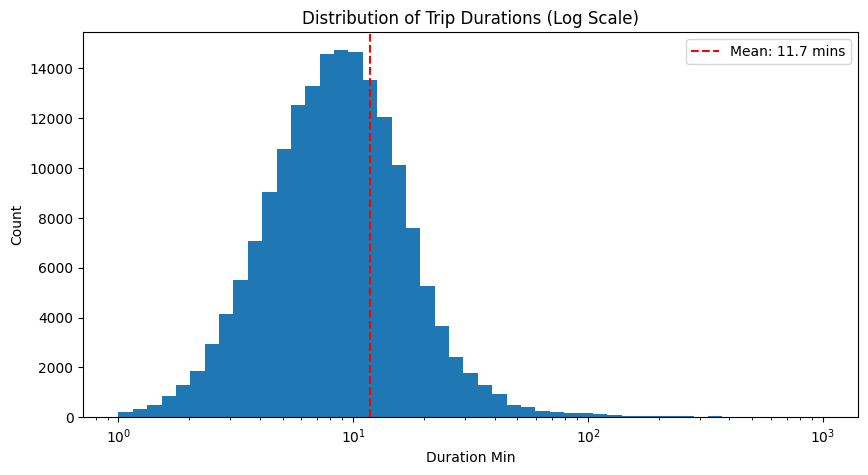

In [21]:
# plot histogram with log scale to know the distribution of trip duration
plot_histogram(
    data=cleaned_df, 
    column='duration_min', 
    log_scale=True, 
    title='Distribution of Trip Durations (Log Scale)'
)

# create a virtical line to see the mean of minuts
plt.axvline(cleaned_df['duration_min'].mean(), color='red', linestyle='--', label=f'Mean: {cleaned_df["duration_min"].mean():.1f} mins')
plt.legend()
plt.show();

#### Observation
The trip duration distribution is heavily **right-skewed**, with most trips lasting under **30 minutes**. A log transformation reveals a clear peak around **10 minutes**, likely representing commuters. While longer trips are less frequent, they may indicate casual users or special cases, suggesting potential for further segmentation by user type.

### Question 2: How many users are subscribers vs. casual?

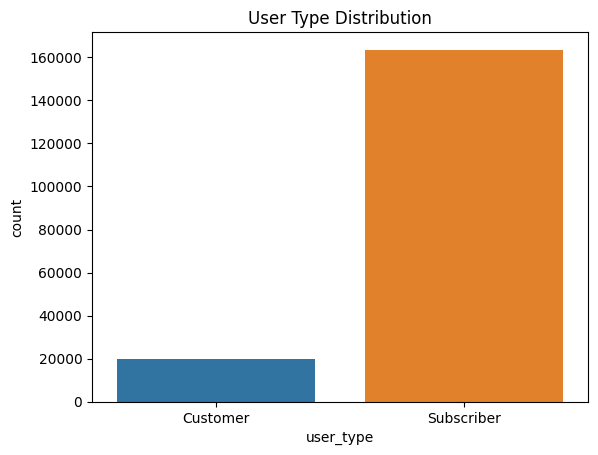

In [22]:
# create bar chart show the user types
sns.countplot(data=df, x='user_type')
plt.title('User Type Distribution')
plt.show()

#### Observation
The majority of users are **Subscribers**, while a much smaller portion are **Customers**. This suggests that most riders use the service regularly, likely for commuting, while casual users are fewer in number.

### Question 3: What are the peak days and hours for trips?

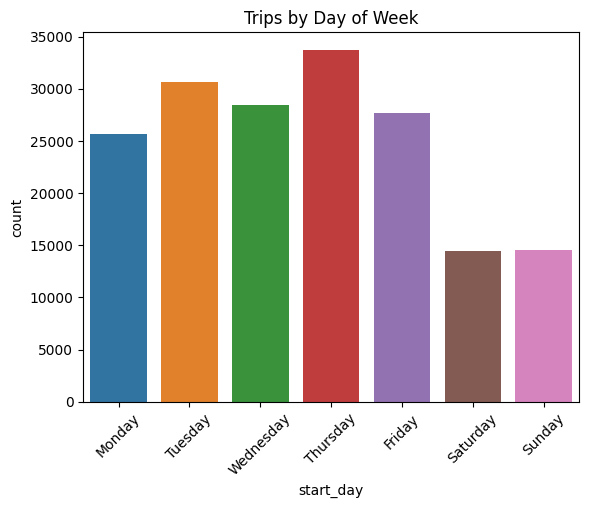

In [23]:
# count plot for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=cleaned_df, x='start_day', order=day_order)
plt.title('Trips by Day of Week')
plt.xticks(rotation=45);

#### Observation
Most trips occur on weekdays, with Thursday having the highest number of trips. Weekends see significantly fewer trips

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
**Distribution(s) of Variables of Interest**

- **Trip Duration:** The distribution is heavily right-skewed, with most rides around 10 minutes and a mean of about 11.7 minutes. Because of the long tail (some rides last much longer), a log transformation was applied to better visualize the data.

- **User Type:** The majority of users are Subscribers, far outnumbering Customers. This indicates a strong regular-rider base compared to casual riders.

- **Day of Week:** Most trips occur on weekdays, with Thursday having the highest count. Weekends (Saturday and Sunday) see fewer trips.

**Unusual Points**

- Some very long trip durations appear as outliers, but they’re relatively rare compared to the large number of shorter trips.

**Transformations Performed**

- A log scale was used for trip duration to handle the right-skew and outliers more effectively.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

**1 - Unusual Distributions**

 - **Trip Duration** was **heavily right-skewed**, with most rides clustering around 10 minutes but a long tail of much longer trips. This skew made it hard to visualize using a standard linear scale.

**2 - Data Transformations & Adjustments**

 - **Log Scale for Trip Duration:** To handle the right-skew and outliers, we applied a log transformation (or log-scale plotting) so the distribution is easier to interpret.

 - **Converting Date/Time Columns:** We changed start_time and end_time to datetime format, then extracted features like start_day and start_hour.

 - **Encoding User Type:** Converted user_type to a categorical variable for easier plotting and analysis.

<hr>

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

### Question 4: Do subscribers take shorter trips than casual users?

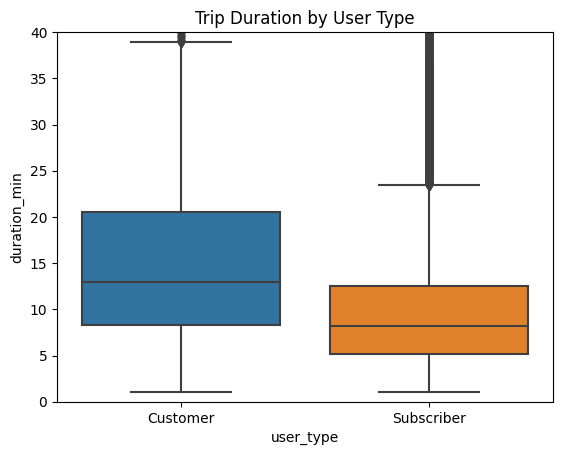

In [24]:
# box plot to show the trip duration for user types
plot_boxplot(
    data=cleaned_df,
    x='user_type',
    y='duration_min',
    title='Trip Duration by User Type',
    ylim=(0, 40)  # Filter outliers
)

#### Observation
**Customers** take longer trips on average than **Subscribers**, with a wider range of trip durations. Subscribers' trips are generally shorter and more consistent

### Question 5: Is there a relationship between rider age and trip duration?

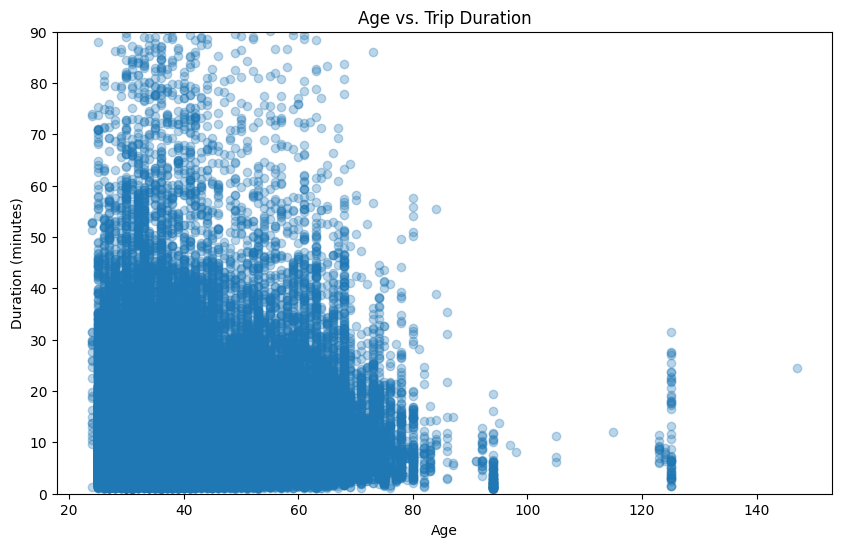

In [25]:
# Scatterplot with transparency to reduce overplotting
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['age'], cleaned_df['duration_min'], alpha=0.3)
plt.title('Age vs. Trip Duration')
plt.xlabel('Age')
plt.ylabel('Duration (minutes)')
plt.ylim(0, 90)    # Filter extreme outliers
plt.show()

#### Observation
Most trips are taken by younger individuals **(20–60 years old)**, with trip durations generally decreasing as age increases. There are **some outliers with unrealistically high ages (100+)**

### Question 6: When are bikes most frequently used?

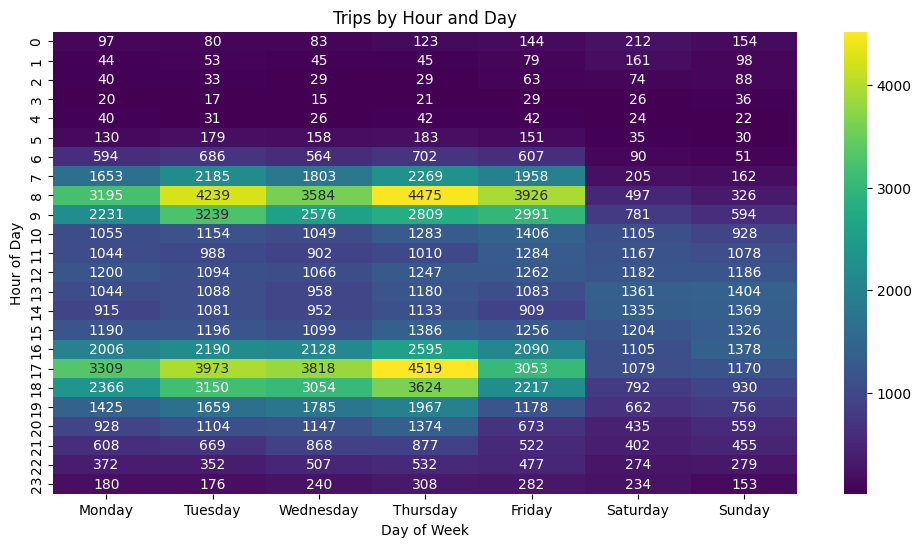

In [26]:
# ensure data is correctly structured
hour_day = cleaned_df.groupby(['start_hour', 'start_day']).size().unstack()

# reorder columns to match day_order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_day = hour_day.reindex(columns=day_order, fill_value=0)

# plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hour_day, cmap='viridis', annot=True, fmt='d')

plt.title('Trips by Hour and Day')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

#### Observation
- Peak hours: Most trips happen between **8 AM - 10 AM and 4 PM - 6 PM**.
- Busiest day: **Thursday and Tuesday** have the most trips.
- Weekend drop: Fewer trips on **Saturday and Sunday**.
- Low activity: Very few trips between **midnight and 5 AM**.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

User Types & Trip Lengths (Boxplot)
Let’s start with the riders: casual customers take their sweet time! Their trips stretch longer and vary wildly compared to subscribers, who stick to quick, predictable rides. It looks like subscribers are probably using these bikes for daily routines—think zipping to work or grabbing coffee—while customers might be tourists or occasional riders exploring the city without rushing.

Does Age Affect Ride Duration? (Scatter Plot)
Plotting age against trip duration reveals something interesting: 95% of rides wrap up in under 20 minutes, no matter if the rider is 25 or 65. But here’s the kicker—we spotted a few wild outliers. Imagine 80-year-olds logging marathon rides or someone clocking a 3-hour trip! For most riders though, age doesn’t seem to dictate how long they stay on the bike.

When Do People Ride? (Heatmap)
The heatmap tells a story of rush hours and quiet weekends. Weekdays explode with activity, especially Tuesdays and Thursdays, with predictable spikes at 8-10 AM and 4-6 PM (classic commuter behavior!). Weekends? Barely a blip. Feels like people ditch the bikes for errands or leisure, sticking to cars, walking, or just staying in.

This paints a clear picture: bikes are a workday workhorse for regulars, while casual users treat them like flexible joyrides.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

One interesting relationship (beyond trip duration) is how user type and day of the week interact:

Subscribers are far more active on weekdays, aligning with commute patterns.
Customers show a relatively smaller but more evenly spread usage, with slightly more rides on weekends.

<hr>

## Multivariate Exploration

### Question 7: How do user type and day of the week jointly affect trip duration?

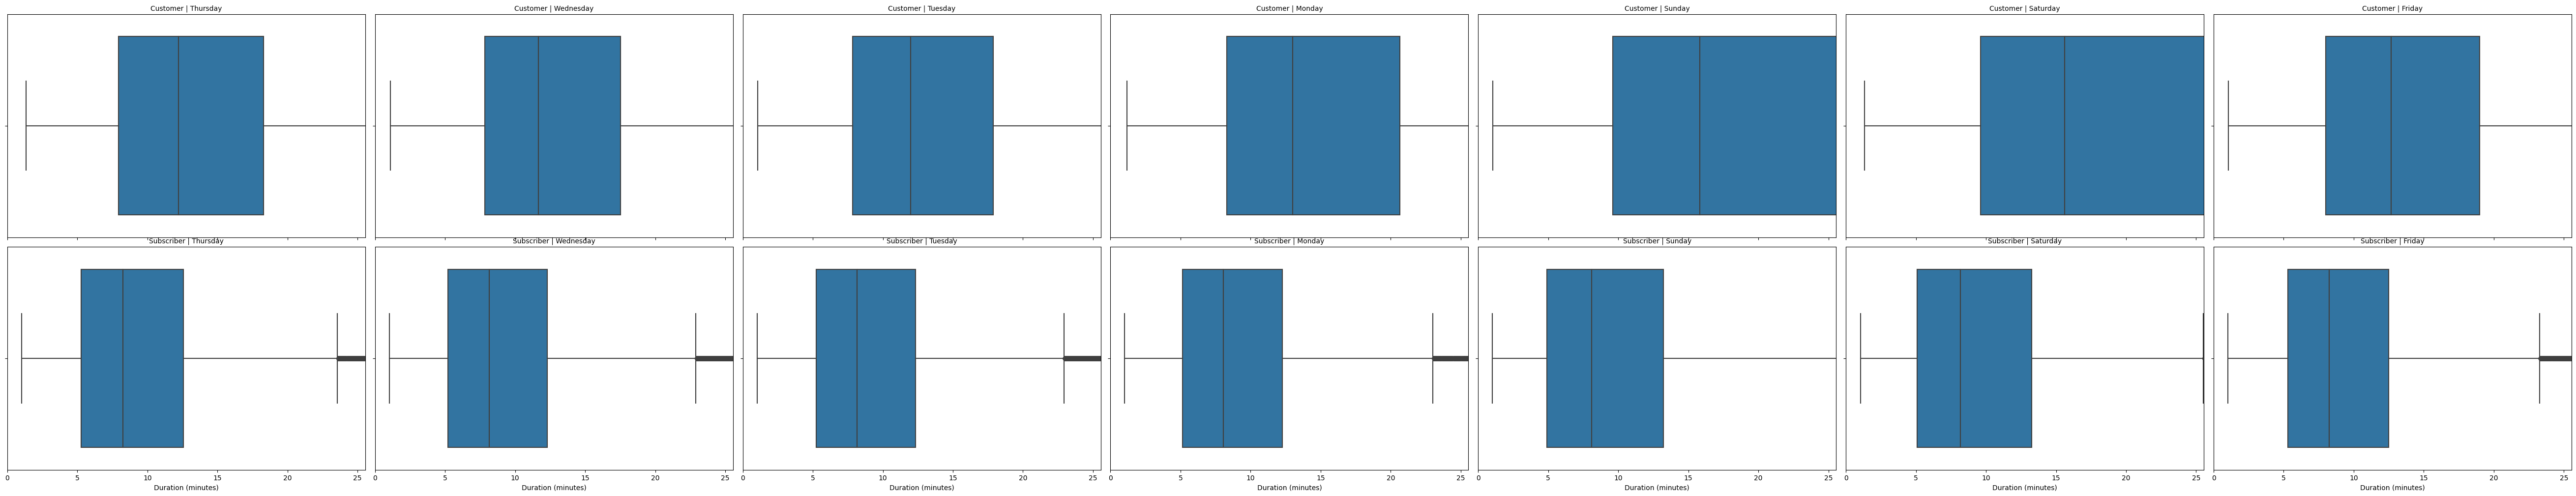

In [27]:
# Create FacetGrid for duration by day and user type
g = sns.FacetGrid(data=cleaned_df, col="start_day", row="user_type", height=5, aspect=1.5, despine=False)

# Use the function inside FacetGrid
g.map_dataframe(plot_boxplot, x="duration_min")

# Adjust labels and formatting
g.set_axis_labels("Trip Duration (minutes)", "")
g.set_titles(row_template="{row_name}", col_template="{col_name}")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xlim(0, cleaned_df["duration_min"].quantile(0.95))  # Remove extreme outliers
    ax.set_xlabel("Duration (minutes)")

plt.show()

#### Observation
- **Subscribers take shorter trips** – Their trips are more consistent.
- **Customers take longer trips** – Their trip duration varies more.
- **No big difference across days** – Trip duration looks similar every day.

### Question 8: How do age, user type, and duration interact?

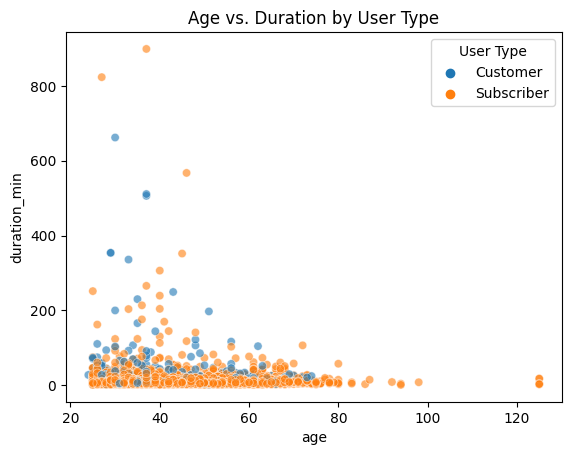

In [28]:
# Scatterplot with hue of user_type shows the relationship between Age and duration by user type
sns.scatterplot(data=cleaned_df.sample(10000, random_state=42), x='age', y='duration_min', hue='user_type', alpha=0.6)
plt.title('Age vs. Duration by User Type')
plt.legend(title='User Type');

#### Observation
- Most trips are short **(under 100 minutes)**.
- Users are mainly between **20 and 80 years old**.
- Some **outliers** in both age and duration.
- **Subscribers** are more common than **Customers**.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

**1 - User Type × Day of Week × Trip Duration (Faceted Boxplots)**

 - Across all days, Customers consistently have longer median trip durations than Subscribers.
<br />

 - Day of week doesn’t significantly change the difference in trip duration between user types.
 <br />
 
 - This indicates that user type is the stronger factor influencing trip duration rather than the specific day of the week.


**2 - User Type × Age × Trip Duration (Scatter Plot)**

 - Customers (blue) show a wider range of durations across ages, including very long trips.
<br />

 - Subscribers (orange) have shorter, more consistent trip durations regardless of age.
<br />

 - Older riders (70+ years) still appear in both groups, but most stick to shorter rides—especially subscribers.
 
**Features That Strengthen the Main Interest (Trip Duration)**

- User Type stands out as the most influential factor on trip duration, overshadowing day-of-week and age effects.
<br />

- Age adds context: while most riders keep trips under 20 minutes, younger customers occasionally push trip durations much higher.
<br />

- Day of the Week doesn’t drastically alter the customer–subscriber duration gap; it simply shows that both groups ride more on weekdays.
<br />

### Were there any interesting or surprising interactions between features?

> One surprising finding was that day of the week doesn’t significantly change the difference in trip durations between customers and subscribers - the gap remains fairly consistent. Another interesting interaction is how older customers sometimes take very long trips, whereas older subscribers generally keep trip lengths short, mirroring younger subscribers. These patterns suggest user type has a stronger influence on duration than age or day of the week.

## Conclusions

### Summary of Main Findings
**1 - Trip Duration Distribution**

 - The majority of rides are under 15 minutes, and the distribution is heavily right-skewed.
 - A log scale reveals most trips cluster around 10 minutes, with a mean of about 11.7 minutes.

**2 - User Type Patterns**

 - Subscribers dominate the dataset, vastly outnumbering Customers.
 - Subscribers typically take shorter, more consistent trips.
Customers have longer median trip durations and more outliers.

**3 - Peak Usage Times**

 - Trips peak on weekdays, especially Thursday and Tuesday, with high activity during commuting hours (8–10 AM, 4–6 PM).
 - Weekend usage drops noticeably.

**4 - Age vs. Trip Duration**

 - Most users are between 20–60 years old.
 - Age itself doesn’t strongly predict trip length, though older riders still tend to take shorter trips, especially among subscribers.
 - Some older customers (70+ years) occasionally have very long trip durations, indicating potential outliers or special cases.

**5 - Interactions of Day, User Type, and Age**

 - User Type is the strongest factor influencing trip duration: customers generally ride longer than subscribers across all days.
 - Age has a minor effect; older customers can still take long trips, but subscribers remain consistent.
<hr>
### Reflection on Data Exploration Steps
**Data Cleaning:**

 - Removed irrelevant columns, converted time fields to datetime, and handled missing data.
 - Calculated additional fields like `duration_min`, `age`, and extracted `start_day` and `start_hour`.

**Dealing with Skew and Outliers:**

 - Use a log scale for trip duration to handle the right-skewed distribution and visualize outliers more clearly.

**Univariate, Bivariate, and Multivariate Analyses:**

 - Examined distributions of trip duration, user type, and day of week.
 - Explored how these features interact, revealing that user type (customer vs. subscriber) is key to understanding trip durations.
